<a href="https://colab.research.google.com/github/tuhoangnguyen/AI/blob/main/ProjectMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from prettytable import PrettyTable
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/DataProjectML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/DataProjectML


In [ ]:
data = pd.read_csv("master.csv")
#Đổi tên các cột lại

data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns
data

,country,year,gender,age_group,suicide_count,population,suicide_rate,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
# Thông tin về dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
data.age_group.value_counts()

age_group
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: count, dtype: int64

In [ ]:
data.generation.value_counts()

generation
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: count, dtype: int64

In [ ]:
# Liệt kê các quốc gia có trong dataset

country = data.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

**Vẽ các biểu đồ để thấy phân bố của dữ liệu**

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'suicide_count'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'suicide_rate'}>],
       [<Axes: title={'center': 'HDI for year'}>,
        <Axes: title={'center': 'gdp_per_capita'}>]], dtype=object)

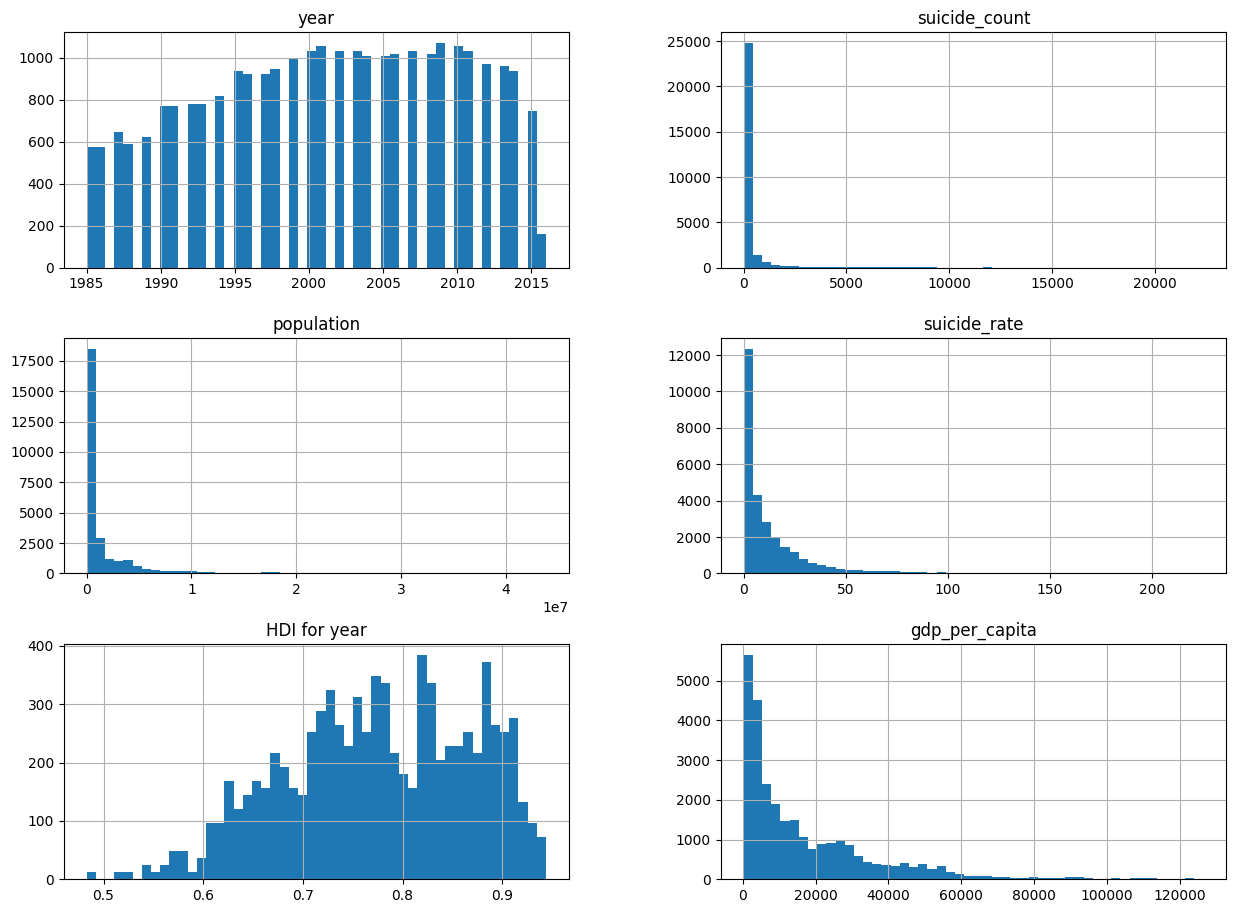

In [ ]:
data.hist(bins = 50,figsize = (15,11))

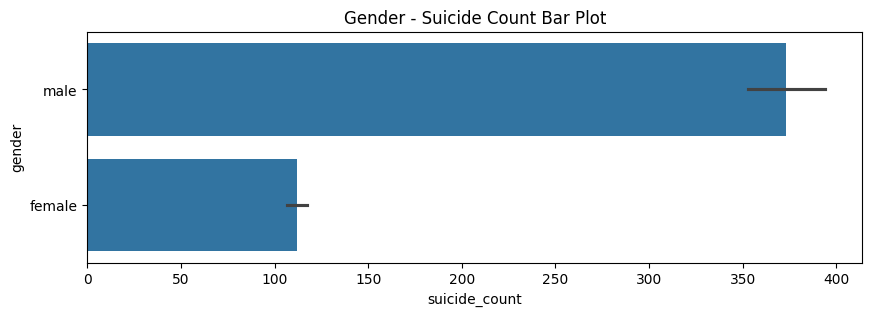

In [ ]:
# Số lượng tự tử theo giới tính cho thấy nam nhiều hơn nữ

plt.figure(figsize=(10,3))
sns.barplot(x='suicide_count', y='gender', data=data)
plt.title('Gender - Suicide Count Bar Plot')
plt.show()



**Biểu đồ trên cho thấy các trường hợp tự tử xảy ra nhiều hơn ở nam giới.**

Nhưng hãy xem liệu mô hình này có tồn tại ở tất cả các nhóm tuổi và thế hệ hay không.

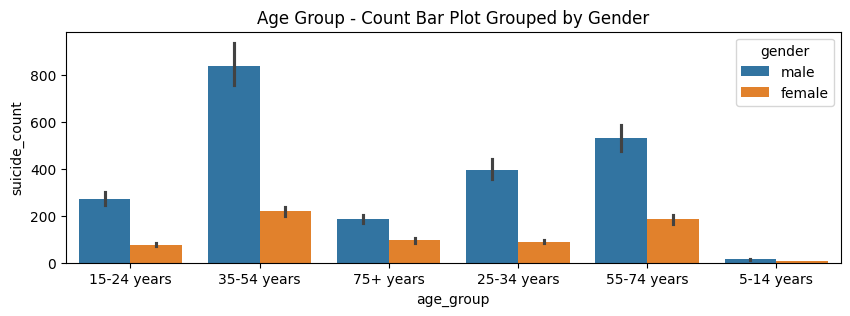

In [ ]:
# Nhóm tuổi - số ca tự tử được nhóm theo giới tính

plt.figure(figsize=(10,3))
sns.barplot(x = "age_group", y = "suicide_count", hue = "gender", data = data)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

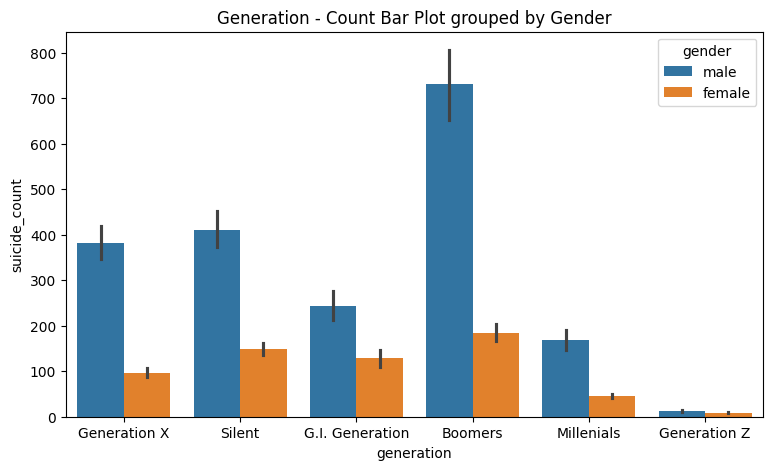

In [ ]:
# Thế hệ - Số ca tự tử được nhóm theo giới tính

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = data)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

**Từ hai biểu đồ trên, có thể thấy rõ rằng nam giới tự tử nhiều hơn đáng kể so với phụ nữ, bất kể họ thuộc nhóm tuổi và thế hệ nào.**

Bây giờ, hãy kiểm tra các trường hợp tự tử dựa trên nhóm tuổi.

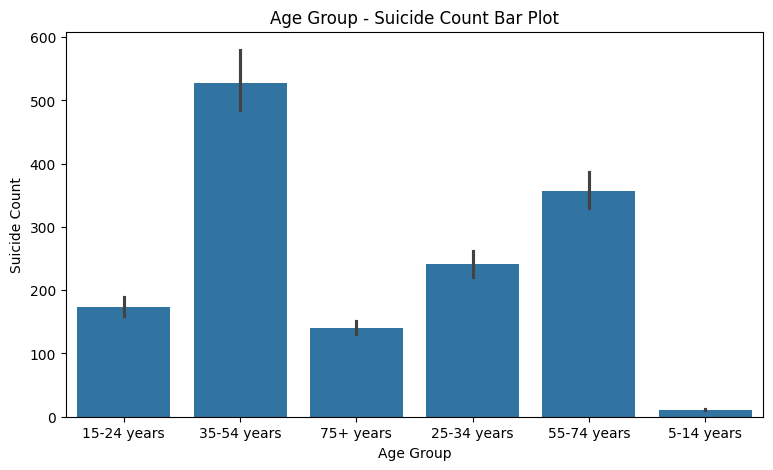

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x=data['age_group'], y=data['suicide_count'])
plt.xlabel('Age Group')
plt.ylabel('Suicide Count')
plt.title('Age Group - Suicide Count Bar Plot')
plt.show()

Biểu đồ trên cho thấy các trường hợp tự tử nhiều hơn ở nhóm tuổi 35-54, tiếp theo là 55-74 tuổi. Điều đáng ngạc nhiên là các trường hợp tự tử ở nhóm tuổi 5-14 tuổi mặc dù rất ít, chủ yếu ở mức hàng chục.

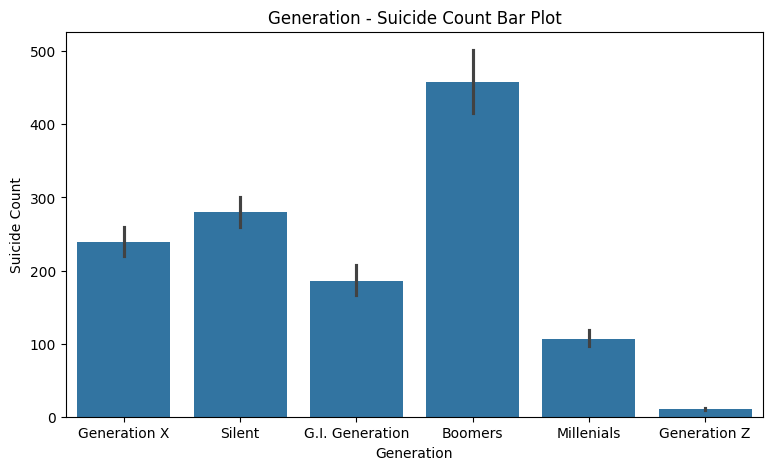

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x=data['generation'], y=data['suicide_count'])
plt.xlabel('Generation')
plt.ylabel('Suicide Count')
plt.title('Generation - Suicide Count Bar Plot')
plt.show()



*   Sơ đồ trên cho thấy các trường hợp tự tử xảy ra nhiều hơn ở thế hệ Boomers, thế hệ Silent và thế hệ X. Những thế hệ này bao gồm những người sinh đến năm 1976 dựa trên thông tin chi tiết được cung cấp.
*   Khi quan sát sâu hơn, những thế hệ này là những thế hệ mà hầu hết họ đều ở trong độ tuổi xảy ra nhiều vụ tự tử nhất.

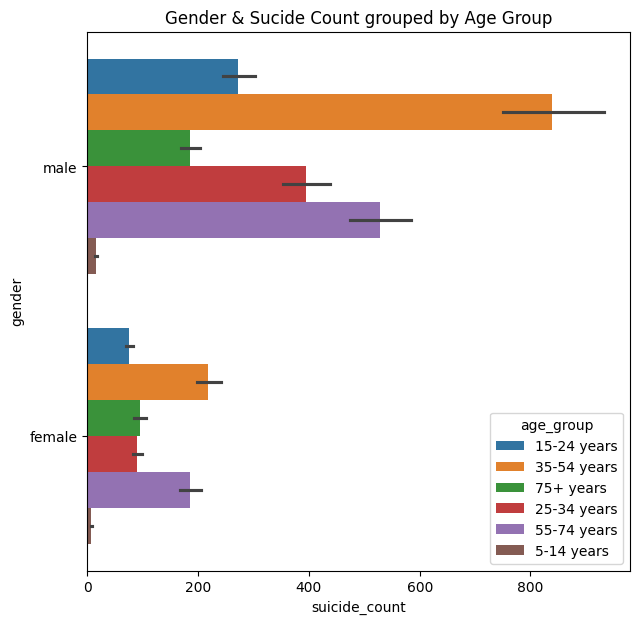

In [ ]:
# Giới tính & Số ca tự tử được nhóm theo nhóm tuổi
plt.figure(figsize=(7,7))
sns.barplot(y="gender", x="suicide_count", hue="age_group", data=data)
plt.title('Gender & Sucide Count grouped by Age Group')
plt.show()



*   Từ biểu đồ trên, chúng ta có thể suy ra rằng nhóm tuổi 35-54 có nhiều khả năng tự tử hơn bất kể giới tính ở nhóm tuổi 55-74.
*   Nhìn chung, rõ ràng là nam giới có xu hướng tự tử nhiều hơn nữ giới.



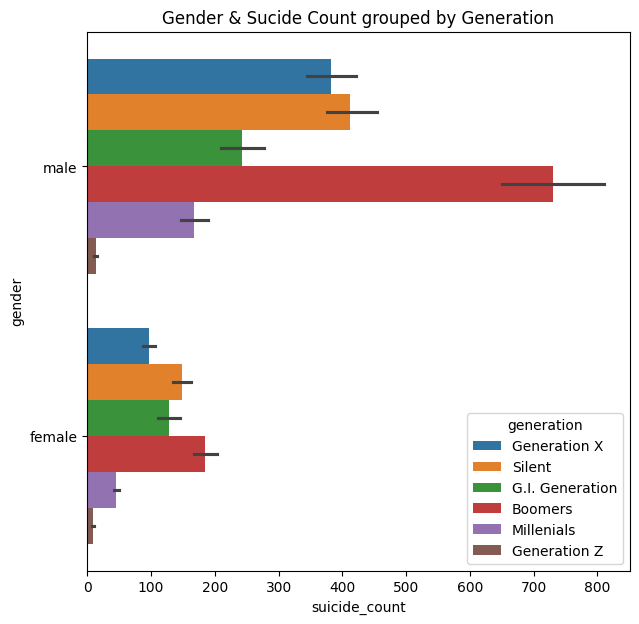

In [ ]:
# Giới tính & Số lượng tự tử được nhóm theo biểu đồ thanh Thế hệ

plt.figure(figsize=(7,7))
sns.barplot(y="gender", x="suicide_count", hue="generation", data=data)
plt.title('Gender & Sucide Count grouped by Generation')
plt.show()



* Trong trường hợp thế hệ, thế hệ Bloomers có nhiều trường hợp tự tử hơn, tiếp theo là thế hệ Silent, không phân biệt giới tính.
* Ngay cả khi đang xem xét ở các thế hệ, nam giới cũng có nhiều khả năng tự tử hơn.



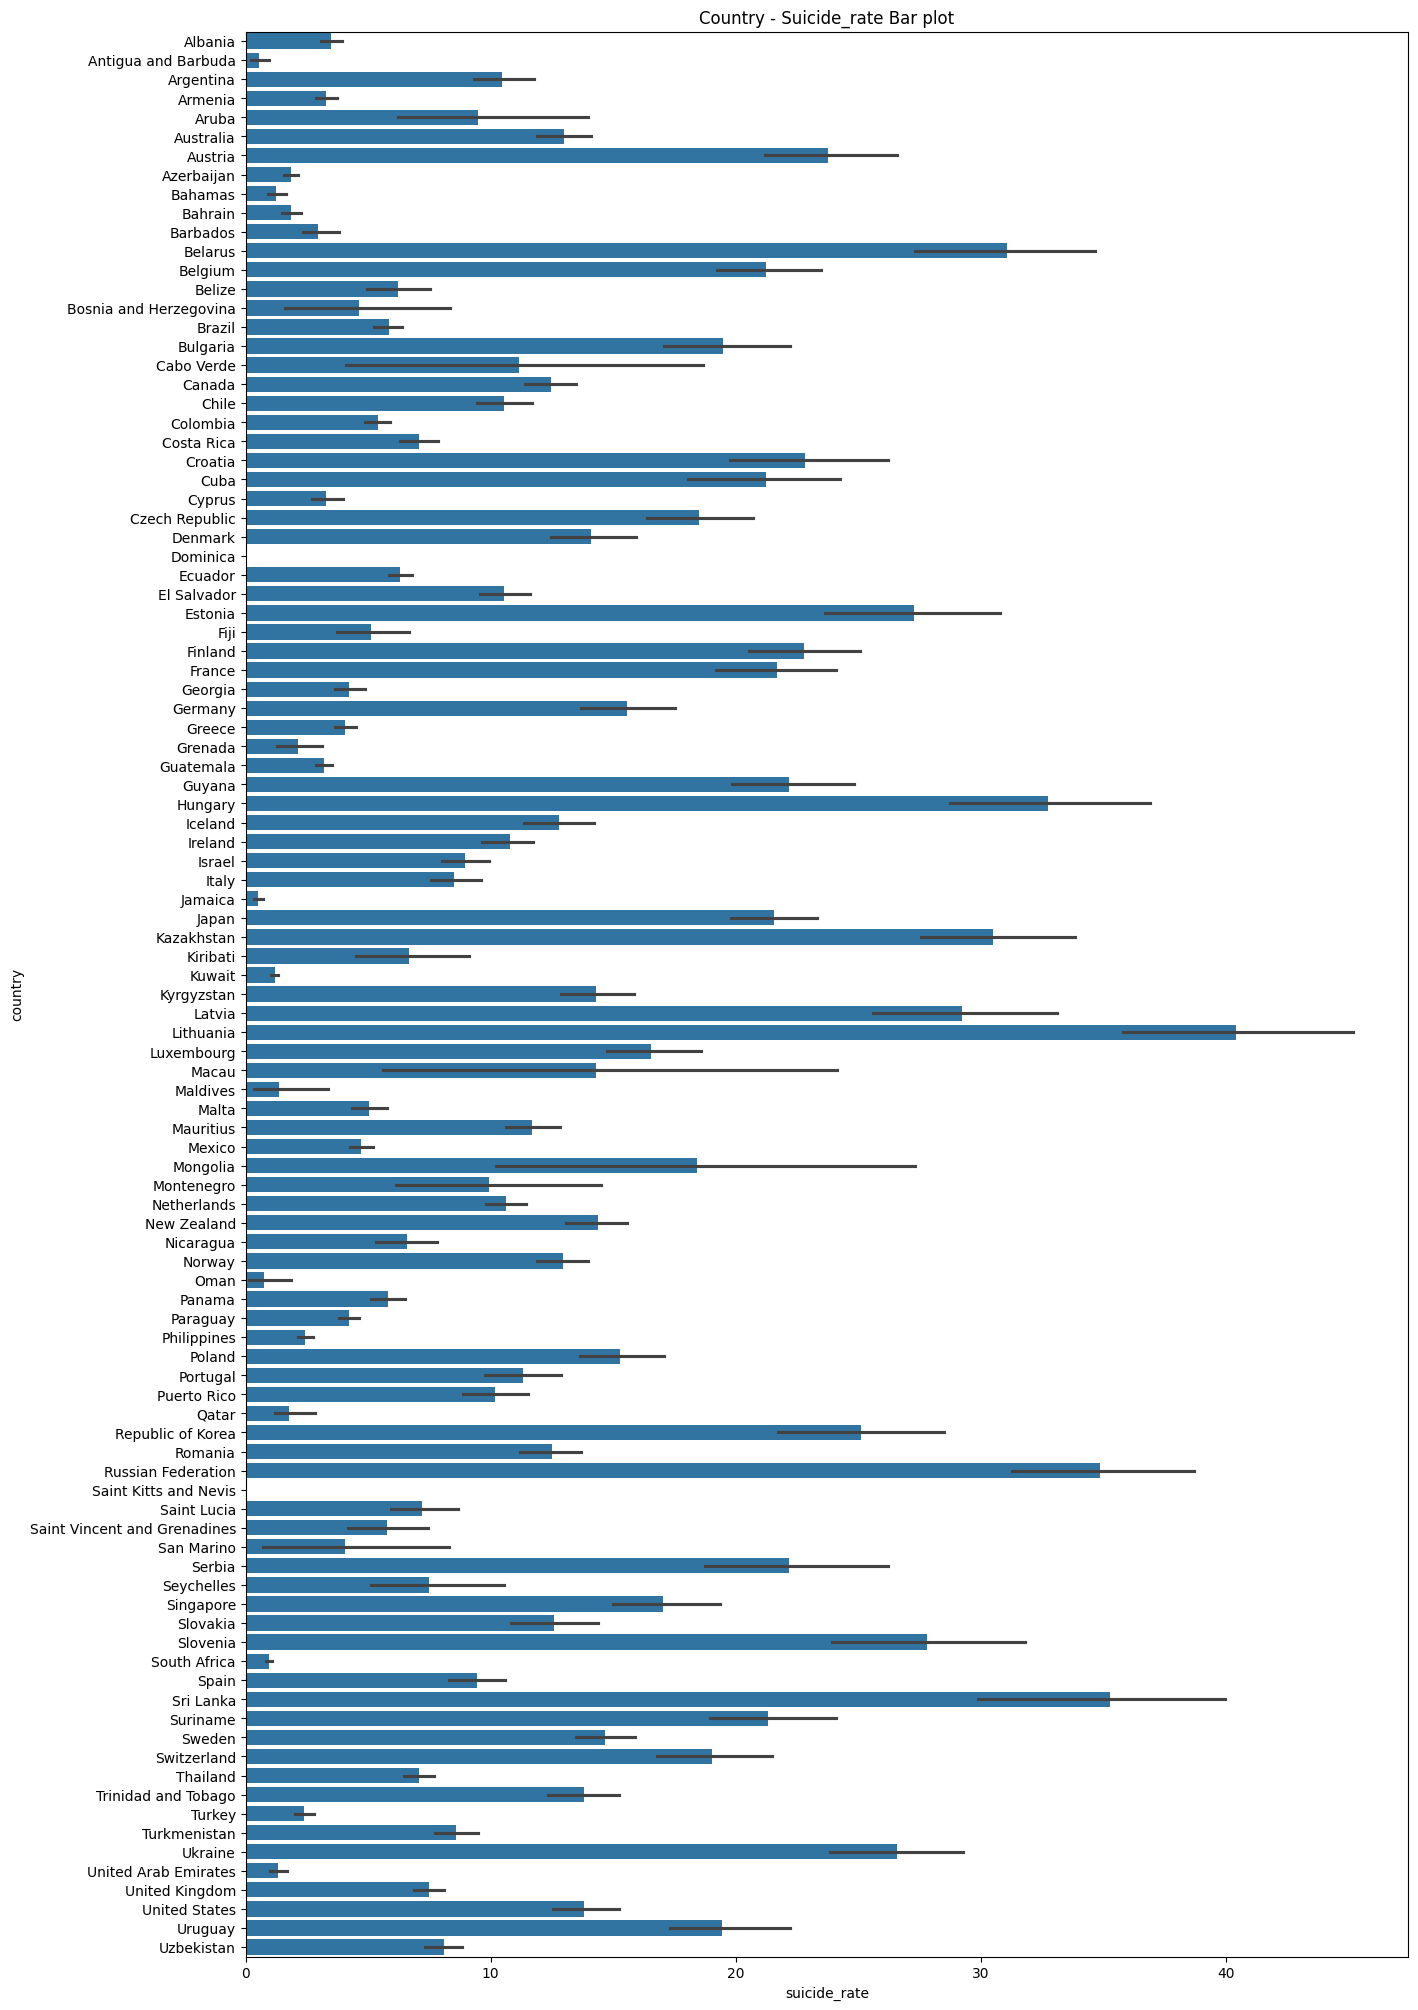

In [ ]:
# Quốc gia và tỉ lệ tự tử

plt.figure(figsize=(15,25))
sns.barplot(x = "suicide_rate", y = "country", data = data)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

**Biểu đồ trên cho thấy quốc gia có tỷ lệ tự tử cao nhất là Litva, tiếp theo là Sri Lanka.**

<Axes: xlabel='year'>

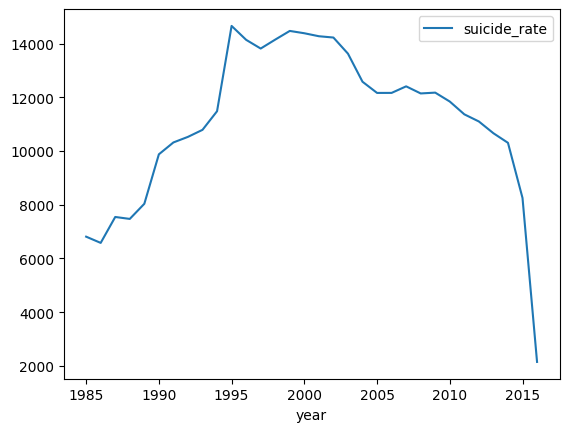

In [ ]:
data[['year','suicide_rate']].groupby(['year']).sum().plot()


**Quan sát từ biểu đồ trên cho thấy tỷ lệ tự tử đã tăng nhanh từ năm 1990 và tỷ lệ tự tử đã giảm mạnh vào năm 2016.** Tập dữ liệu được thu thập vào đầu năm 2016. Vì vậy, tất cả các trường hợp tự tử năm 2016 đều không phải được ghi lại trong tập dữ liệu.

<Figure size 2000x1000 with 0 Axes>

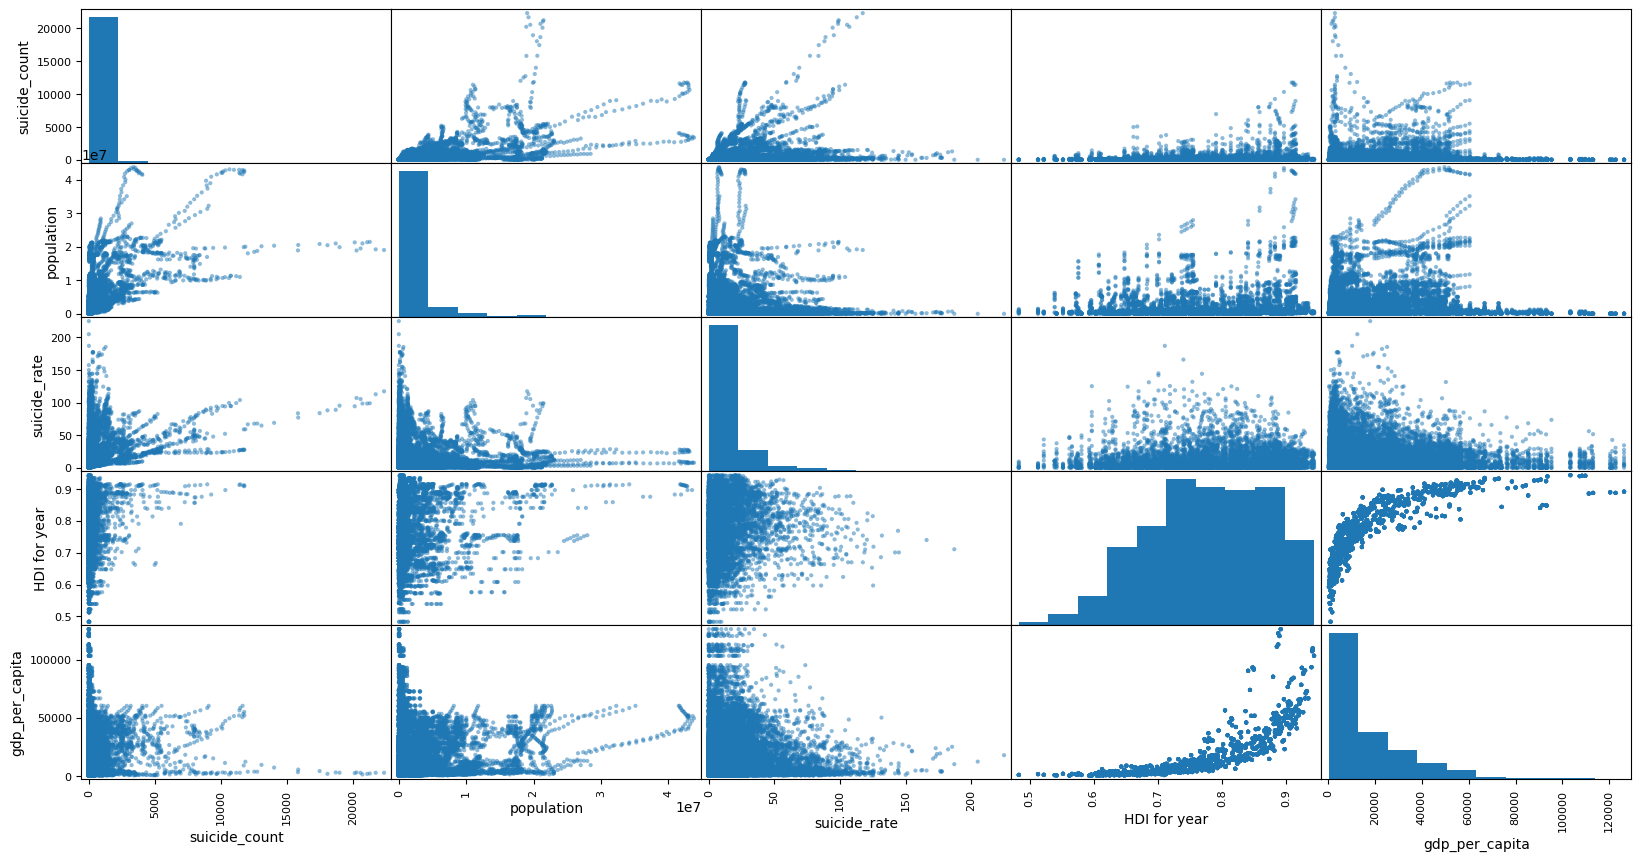

In [ ]:
# Kiểm tra ngoại lệ

plt.figure(figsize=(20,10))
attributes = ['suicide_count', 'population', 'suicide_rate','HDI for year',
              'gdp_for_year','gdp_per_capita']
scatter_matrix(data[attributes], figsize=(20,10))
plt.show()

**Phương pháp tiền xử lí dữ liệu**

In [ ]:
# Kiểm tra thì thấy chỉ có HDI for year đang bị missing values
data.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64


Từ số liệu thống kê trên, rõ ràng là cột HDI trong năm có 19456 giá trị null trong số 27820 mẫu, chiếm khoảng 70% cột. Điều này có thể làm xáo trộn hiệu suất của mô hình, do đó loại bỏ cột HDI cho năm khỏi tập dữ liệu.

In [ ]:
# bỏ cột HDI cho năm
data = data.drop(['HDI for year'], axis = 1)
data.shape


(27820, 11)

In [ ]:
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [ ]:
# bỏ cột quốc gia theo năm

data = data.drop(['country-year'], axis = 1)
data.shape

(27820, 10)

Bây giờ chúng ta sẽ phân tích sâu hơn với 10 features bao gồm cả cột mục tiêu. Để đảm bảo hơn nữa, hãy loại bỏ tất cả các hàng rỗng khỏi tập dữ liệu.

In [ ]:
# Bỏ các cột có các giá trị rỗng

data = data.dropna()
data.shape

(27820, 10)

Các cột có nhãn không phải là số như country, year, gender, age_group and generation sẽ được chuyển đổi thành nhãn số, nhằm chuẩn bị dữ liệu cho việc sử dụng trong các mô hình học máy.
Có thể được thực hiện bằng cách sử dụng LabelEncode của SkLearn.

In [ ]:
#encoding the categorical features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age_group', 'gender', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

In [ ]:
#creating a copy of dataset for statistical test

stat_data = data.copy()
stat_data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2
27816,100,29,0,5,9,348465,2.58,"63,067,077,179",2309,5
27817,100,29,1,3,60,2762158,2.17,"63,067,077,179",2309,3
27818,100,29,0,3,44,2631600,1.67,"63,067,077,179",2309,3


Tiêu chuẩn hóa tập dữ liệu là yêu cầu chung đối với nhiều công cụ ước tính học máy: chúng có thể hoạt động kém nếu các đặc điểm riêng lẻ ít nhiều trông giống dữ liệu được phân phối thông thường theo tiêu chuẩn. Vì vậy, các cột số, dân số, gdp_for_year & gdp_per_capita đang được chuẩn hóa bằng RobustScalar của SkLearn.

In [ ]:
# Kiểm tra dữ liệu từng cột

data.dtypes

country             int64
year                int64
gender              int64
age_group           int64
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int64
dtype: object

In [ ]:
# Chuyển đổi cột 'gdp_for_year' thành cột float từ object

data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

In [ ]:
# Chia tỷ lệ các cột dữ liệu số bằng RobustScalar

numerical = ['suicide_count', 'population', 'suicide_rate',
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data[numerical] = rc.fit_transform(data[numerical])
data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,-0.031250,-0.084435,0.045860,-0.182942,-0.400243,2
1,0,2,1,2,-0.070312,-0.087963,-0.050955,-0.182942,-0.400243,5
2,0,2,0,0,-0.085938,-0.101142,-0.073885,-0.182942,-0.400243,2
3,0,2,1,5,-0.187500,-0.294064,-0.089172,-0.182942,-0.400243,1
4,0,2,1,1,-0.125000,-0.112232,-0.172611,-0.182942,-0.400243,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,0.640625,2.297696,-0.192994,0.059520,-0.329631,2
27816,100,29,0,5,-0.125000,-0.058824,-0.217197,0.059520,-0.329631,5
27817,100,29,1,3,0.273438,1.679341,-0.243312,0.059520,-0.329631,3
27818,100,29,0,3,0.148438,1.585323,-0.275159,0.059520,-0.329631,3


In [ ]:


#dropping the HDI for year column
#data = data.drop(['HDI for year'], axis = 1)
#data.shape

#dropping the country-year for year column

#data = data.drop(['country-year'], axis = 1)
#data.shape

#droppinf off any null rows (is any)

#data = data.dropna()
#data.shape

#categorical = ['country', 'year','age_group', 'gender', 'generation']
#le = sklearn.preprocessing.LabelEncoder()

#for column in categorical:
    #data[column] = le.fit_transform(data[column])

#imputer = SimpleImputer(missing_values=np.nan, strategy='mean');
#data[['HDI for year']] = imputer.fit_transform(data[['HDI for year']]);
#Checking the data type of each column

#data.dtypes

# Converting the column 'gdp_for_year' to float from object

#data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

#Scaling the numerical data columns with RobustScalar

#numerical = ['suicide_count', 'population', 'suicide_rate',
              #'gdp_for_year','gdp_per_capita']

#from sklearn.preprocessing import RobustScaler

#rc = RobustScaler()
#data[numerical] = rc.fit_transform(data[numerical])

#data


**Chia dữ liệu để train và test**

Dữ liệu được chia thành các tập huấn luyện và kiểm tra, chia 80-20 (80% train và 20% test).




In [ ]:
y = data['suicide_rate']
X = data.drop('suicide_rate',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 9), (5564, 9))

**Xây dựng và đánh giá mô hình**

Đồ án sẽ xây dựng các mô hình máy học giúp dự đoán tỉ lệ tự tử các nước trên Thế giới, sử dụng 3 thuật toán được giảng dạy: Neural Network, Linear Regression và Random Forest.

Các số liệu được xem xét để đánh giá hiệu suất của mô hình là Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R^2), Root Mean Squared Error (RMSE).



**Neural Network**

In [ ]:
def round(number):
    return round(number, 3)

In [ ]:
# Huấn luyện mô hình Neural Network
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Đánh giá mô hình
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)


# Đánh giá trên tập huấn luyện
train_mse = mean_squared_error(y_train, y_pred_train) # MSE đo lường độ lớn của sai số bình phương trung bình giữa các giá trị dự đoán và giá trị thực tế.
train_mae = mean_absolute_error(y_train, y_pred_train) # MAE đo lường độ lớn của sai số tuyệt đối trung bình giữa các giá trị dự đoán và giá trị thực tế.
train_r2 = r2_score(y_train, y_pred_train) # Đo lường tỉ lệ phương sai giải thích của mô hình trên tổng phương sai của dữ liệu.
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train)) # Đo lường sự chênh lệch trung bình giữa các giá trị dự đoán của một mô hình và các giá trị thực tế trong một tập dữ liệu

# Đánh giá trên tập test
nn_mse = mean_squared_error(y_test, y_pred_test) # MSE đo lường độ lớn của sai số bình phương trung bình giữa các giá trị dự đoán và giá trị thực tế.
nn_mae = mean_absolute_error(y_test, y_pred_test) # MAE đo lường độ lớn của sai số tuyệt đối trung bình giữa các giá trị dự đoán và giá trị thực tế.
nn_r2 = r2_score(y_test, y_pred_test) # Đo lường tỉ lệ phương sai giải thích của mô hình trên tổng phương sai của dữ liệu.
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test)) # Đo lường sự chênh lệch trung bình giữa các giá trị dự đoán của một mô hình và các giá trị thực tế trong một tập dữ liệu

# Một mô hình hồi quy tốt thường có MSE và MAE thấp, và R-squared cao.
# In kết quả
print("Training Set:")
print("Mean Squared Error (MSE):", train_mse)
print("Mean Absolute Error (MAE):", train_mae)
print("R-squared (R^2):", train_r2)
print("Root Mean Squared Error (RMSE):",train_rmse)

print("\nTest Set:")
print("Mean Squared Error (MSE):", nn_mse)
print("Mean Absolute Error (MAE):", nn_mae)
print("R-squared (R^2):", nn_r2)
print("Root Mean Squared Error (RMSE):", nn_rmse)


Training Set:
Mean Squared Error (MSE): 0.1757051501315236
Mean Absolute Error (MAE): 0.22643647311123974
R-squared (R^2): 0.8780864089245398
Root Mean Squared Error (RMSE): 0.41917198156785673

Test Set:
Mean Squared Error (MSE): 0.17565007158192422
Mean Absolute Error (MAE): 0.2306377598398577
R-squared (R^2): 0.8850311121965836
Root Mean Squared Error (RMSE): 0.4191062771922227


**Linear Regression**

In [ ]:
# Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra và tập huấn luyện
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Đánh giá trên tập huấn luyện
train_mse = mean_squared_error(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Đánh giá trên tập kiểm tra
lr_mse = mean_squared_error(y_test, y_pred_test)
lr_mae = mean_absolute_error(y_test, y_pred_test)
lr_r2 = r2_score(y_test, y_pred_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# In kết quả
print("Training Set:")
print("Mean Squared Error (MSE):", train_mse)
print("Mean Absolute Error (MAE):", train_mae)
print("R-squared (R^2):", train_r2)
print("Root Mean Squared Error (RMSE):",train_rmse)

print("\nTest Set:")
print("Mean Squared Error (MSE):", lr_mse)
print("Mean Absolute Error (MAE):", lr_mae)
print("R-squared (R^2):", lr_r2)
print("Root Mean Squared Error (RMSE):", lr_rmse)

Training Set:
Mean Squared Error (MSE): 1.0259724785430069
Mean Absolute Error (MAE): 0.6400409863940378
R-squared (R^2): 0.2881256519223243
Root Mean Squared Error (RMSE): 1.0129029956234739

Test Set:
Mean Squared Error (MSE): 1.0753410508174668
Mean Absolute Error (MAE): 0.6477523682460935
R-squared (R^2): 0.29615306439440237
Root Mean Squared Error (RMSE): 1.0369865239324312


**Random Forest**

In [ ]:
# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(max_depth=9)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra và tập huấn luyện
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Đánh giá trên tập huấn luyện
train_mse = mean_squared_error(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Đánh giá trên tập kiểm tra
rf_mse = mean_squared_error(y_test, y_pred_test)
rf_mae = mean_absolute_error(y_test, y_pred_test)
rf_r2 = r2_score(y_test, y_pred_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# In kết quả
print("Training Set:")
print("Mean Squared Error (MSE):", train_mse)
print("Mean Absolute Error (MAE):", train_mae)
print("R-squared (R^2):", train_r2)
print("Root Mean Squared Error (RMSE):",train_rmse)

print("\nTest Set:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R^2):", rf_r2)
print("Root Mean Squared Error (RMSE):", rf_rmse)

Training Set:
Mean Squared Error (MSE): 0.019121878050462053
Mean Absolute Error (MAE): 0.06375900809994367
R-squared (R^2): 0.9867322225928277
Root Mean Squared Error (RMSE): 0.13828187896634198

Test Set:
Mean Squared Error (MSE): 0.030836569457333325
Mean Absolute Error (MAE): 0.07250145637164987
R-squared (R^2): 0.9798164267042221
Root Mean Squared Error (RMSE): 0.17560344375134937


So sánh hiệu quả của 3 thuật toán trên

In [ ]:
table = PrettyTable()

table.field_names = ["Model", "Mean Squared Error", "Mean Absolute Error", "R-squared", "Root Mean Squared Error"]

table.add_row(["Neural Network", nn_mse, nn_mae, nn_r2, nn_rmse])
table.add_row(["Linear Regression", lr_mse, lr_mae, lr_r2, lr_rmse])
table.add_row(["Random Forest", rf_mse, rf_mae, rf_r2, rf_rmse])


print(table)

+-------------------+----------------------+---------------------+---------------------+-------------------------+
|       Model       |  Mean Squared Error  | Mean Absolute Error |      R-squared      | Root Mean Squared Error |
+-------------------+----------------------+---------------------+---------------------+-------------------------+
|   Neural Network  | 0.17565007158192422  |  0.2306377598398577 |  0.8850311121965836 |    0.4191062771922227   |
| Linear Regression |  1.0753410508174668  |  0.6477523682460935 | 0.29615306439440237 |    1.0369865239324312   |
|   Random Forest   | 0.030836569457333325 | 0.07250145637164987 |  0.9798164267042221 |   0.17560344375134937   |
+-------------------+----------------------+---------------------+---------------------+-------------------------+
